<h2>Analysis Car Data</h2>
<p>
    <h4>Objectif</h4>
        <ul>
            After completing this analysis you'll be able to :
            <li> Handle missing values</li>
            <li>Correct data formatting</li>
            <li>Explore features or characteristics to predict price of car</li>
            <li>Analyze patterns and run descriptive statistical analysis</li>
            <li>Group data based on identified parameters and create pivot tables</li>
            <li>Standardize and normalize data</li>
            <li>Identify the effect of independent attributes on price of cars</li>
        </ul>
</p>

<h3>Import the Data and import module for analyze it</h3>

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

<h4>Checke and chenge the field path</h4>
<p>We can use "pwd" to see the actual path, "ls" or "Dir" to see all the file or directory </p>

In [254]:
pwd

'C:\\Users\\Usuario'

In [255]:
#Import data into a DataFrame
df = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/All_Data/auto.csv")
#C:\Users\Usuario\Desktop\DATA ANALYSIS PROJECT\All_Data

In [256]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


As we can see, the Data has no header, we have to add a header to the Data

In [261]:
#Create a Header
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [262]:
#Add the header to the Data
df.columns = headers

In [263]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<h2>Data Wrangling</h2>
<h4>Objectives:</h4>
<p1> 
    <ul>After completing this lab you will be able to:
: 
        <li>Handle missing values</li>
        <li>Correct data formatting</li>
        <li>Standardize and normalize data</li>
    </ul>
</p1>

In [268]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [269]:
#Replace the ? by nan numpy
df.replace("?", np.nan, inplace = True)

In [271]:
#Check for missing values
m_val = df.isnull()
m_val.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [272]:
#Loop Loop over the missing values
for col in m_val.columns.values.tolist():
    print(m_val[col].value_counts())
    print("")

symboling
False    204
Name: count, dtype: int64

normalized-losses
False    164
True      40
Name: count, dtype: int64

make
False    204
Name: count, dtype: int64

fuel-type
False    204
Name: count, dtype: int64

aspiration
False    204
Name: count, dtype: int64

num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
False    204
Name: count, dtype: int64

drive-wheels
False    204
Name: count, dtype: int64

engine-location
False    204
Name: count, dtype: int64

wheel-base
False    204
Name: count, dtype: int64

length
False    204
Name: count, dtype: int64

width
False    204
Name: count, dtype: int64

height
False    204
Name: count, dtype: int64

curb-weight
False    204
Name: count, dtype: int64

engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
False    204
Name: count, dtype: int64

engine-size
False    204
Name: count, dtype: int64

fuel-system
False    204
Name: count, dtype: int64

bore
False    200
True       4
Name: count, dtype: 

In [274]:
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<h4>Work with missing Data</h4>

In [278]:
#Replace all the missing value by the mean of the columns
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [280]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [282]:
avg_norm = df["normalized-losses"].astype("float").mean(axis = 0)

In [283]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm)

122.0

In [286]:
avg_bor = df["bore"].astype("float").mean(axis = 0)

In [287]:
avg_bor

3.3290499999999996

In [288]:
df["bore"] = df["bore"].replace(np.nan, avg_bor)

In [299]:
avg_str_peak_hors = df[["stroke","peak-rpm","horsepower", "price"]] = df[["stroke","peak-rpm","horsepower","price"]].astype("float").mean(axis = 0)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21884\354146701.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_str_peak_hors = df[["stroke","peak-rpm","horsepower", "price"]] = df[["stroke","peak-rpm","horsepower","price"]].astype("float").mean(axis = 0)


In [300]:
df[["stroke","peak-rpm","horsepower", "price"]] = df[["stroke","peak-rpm","horsepower","price"]].replace(np.nan, avg_str_peak_hors)

In [333]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,3.2583,9.0,104.222772,5125.990099,21,8.703704,13205.69,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.2583,9.0,104.222772,5125.990099,19,9.038462,13205.69,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,10.0,104.222772,5125.990099,24,7.833333,13205.69,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.2583,8.0,104.222772,5125.990099,18,10.681818,13205.69,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,8.5,104.222772,5125.990099,19,9.400000,13205.69,12.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.2583,9.5,104.222772,5125.990099,23,8.392857,13205.69,10.217391
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.2583,8.7,104.222772,5125.990099,19,9.400000,13205.69,12.368421
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,3.2583,8.8,104.222772,5125.990099,18,10.217391,13205.69,13.055556
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.2583,23.0,104.222772,5125.990099,26,8.703704,13205.69,9.038462


In [335]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
dtype: int64

In [337]:
#Check the value counts of each columns in the data
df[["stroke","peak-rpm","horsepower", "price"]].value_counts()

stroke  peak-rpm     horsepower  price   
3.2583  5125.990099  104.222772  13205.69    204
Name: count, dtype: int64

In [339]:
#Check all the data type
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg          float64
price                float64
city-L/100km         float64
dtype: object

Correct the Data Format

In [342]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [344]:
#Find correlation between  bore, stroke,horse power and compression ration,and price
df[['bore', 'stroke', 'compression-ratio', 'horsepower', "price"]].corr()

,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,NaN,0.005949,NaN,NaN
stroke,NaN,NaN,NaN,NaN,NaN
compression-ratio,0.005949,NaN,1.000000,NaN,NaN
horsepower,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,NaN,NaN,NaN


<h1>DATA VISUALIZATIONS</h1>

<h3>Visualization of al Continous Numerical variables</h3>

In [348]:
#Engine size and price

Text(0.5, 1.0, 'Engine_size Vs Price')

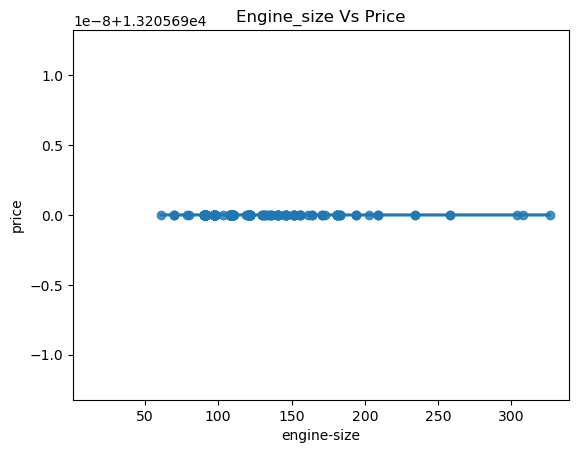

In [350]:
sns.regplot(x= "engine-size", y = "price", data =df)
plt.xlim(1,)
plt.title("Engine_size Vs Price")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/engine_price.png")

In [352]:
df[["price", "engine-size"]].corr()

,price,engine-size
price,NaN,NaN
engine-size,NaN,1.0


Text(0.5, 1.0, 'Highway Vs Price')

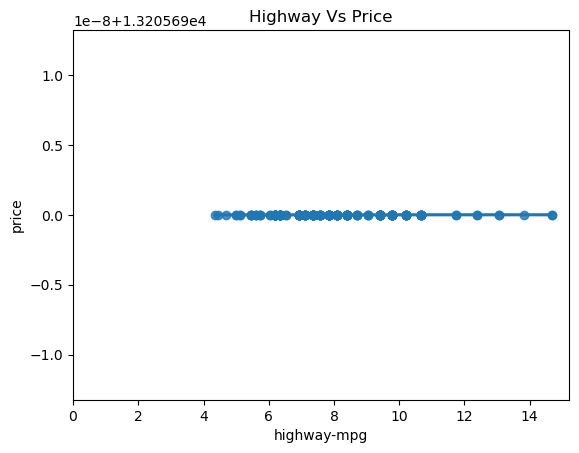

In [354]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.xlim(0,)
plt.title("Highway Vs Price")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/highwayprice.png")

In [356]:
#Correlation 
df[["price", "highway-mpg"]].corr()

,price,highway-mpg
price,NaN,NaN
highway-mpg,NaN,1.0


Text(0.5, 1.0, 'Peak rpm Vs Price')

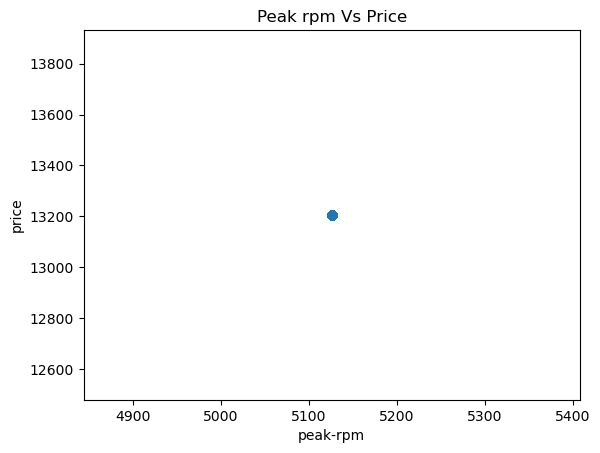

In [358]:
#peak vs price
sns.regplot(x="peak-rpm", 
            y="price", data=df)
plt.title("Peak rpm Vs Price")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/peakrpmprice.png")

Text(0.5, 1.0, 'Stroke Vs Price')

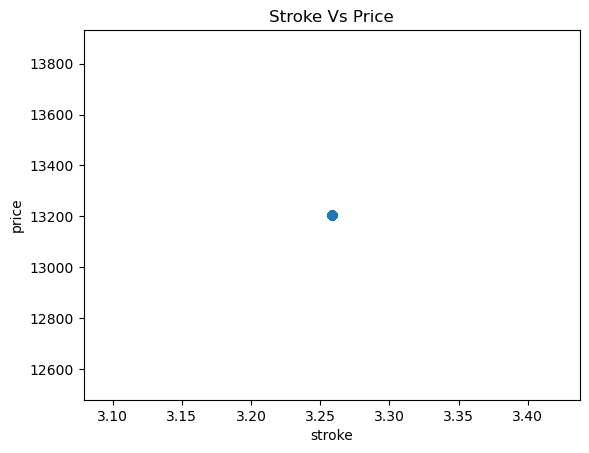

In [360]:
#peak vs price
sns.regplot(x="stroke", 
            y="price", data=df)
plt.title("Stroke Vs Price")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/strokeprice.png")

In [362]:
df[["stroke","price"]].corr()

,stroke,price
stroke,NaN,NaN
price,NaN,NaN


<Axes: xlabel='body-style', ylabel='price'>

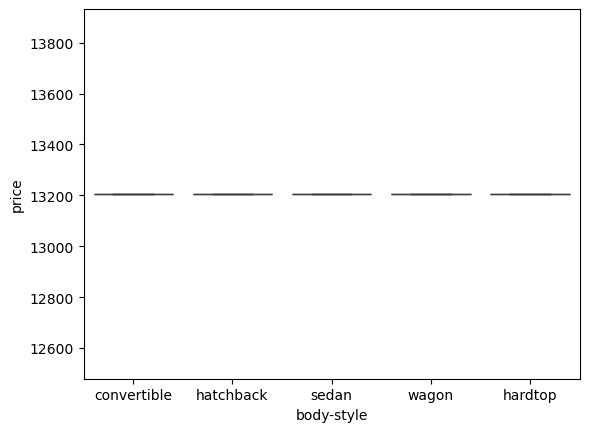

In [364]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

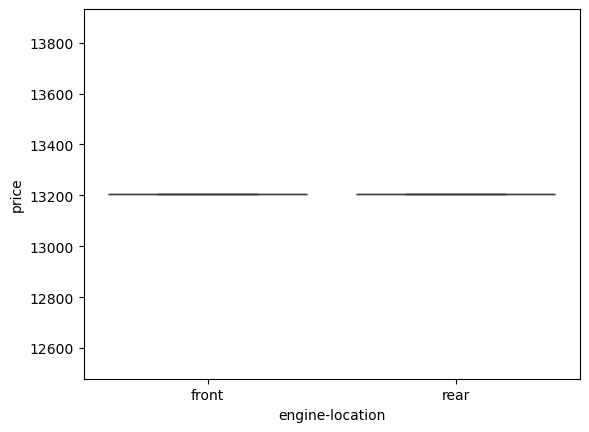

In [366]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

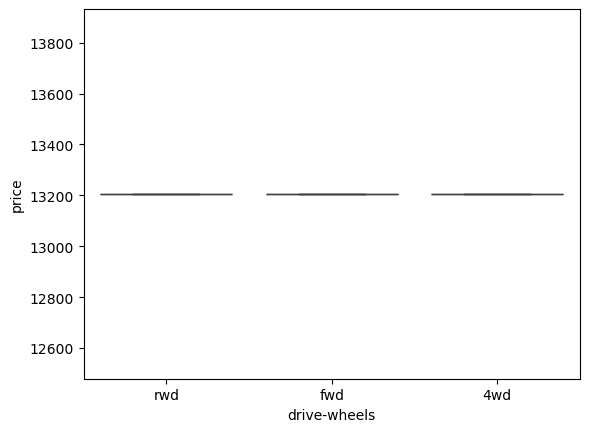

In [368]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Text(0.5, 1.0, 'Visualisation horsepower')

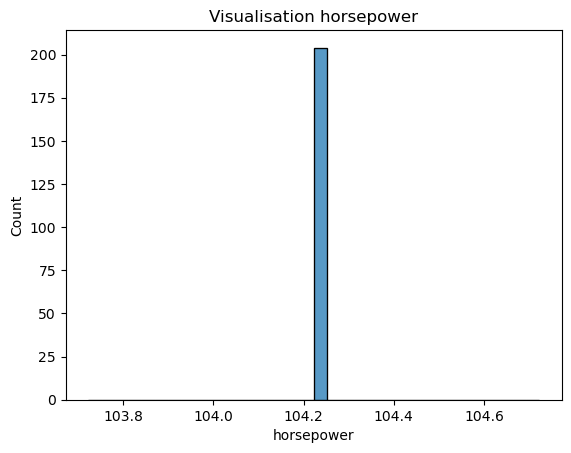

In [370]:
sns.histplot(df["horsepower"], bins =34)
plt.title("Visualisation horsepower")

<Axes: xlabel='engine-location', ylabel='price'>

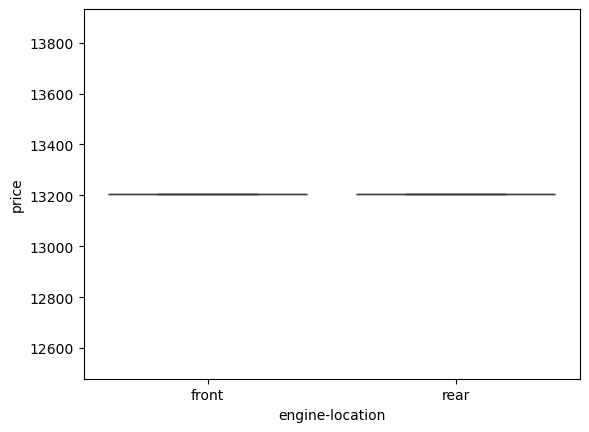

In [371]:
sns.boxplot(x="engine-location", y="price", data=df)

<h3>Standardization Data</h3>

In [375]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,3.2583,9.0,104.222772,5125.990099,21,8.703704,13205.69,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.2583,9.0,104.222772,5125.990099,19,9.038462,13205.69,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,10.0,104.222772,5125.990099,24,7.833333,13205.69,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.2583,8.0,104.222772,5125.990099,18,10.681818,13205.69,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,8.5,104.222772,5125.990099,19,9.400000,13205.69,12.368421


In [377]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,3.2583,9.0,104.222772,5125.990099,21,27.0,13205.69,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.2583,9.0,104.222772,5125.990099,19,26.0,13205.69,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,10.0,104.222772,5125.990099,24,30.0,13205.69,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.2583,8.0,104.222772,5125.990099,18,22.0,13205.69,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,8.5,104.222772,5125.990099,19,25.0,13205.69,12.368421


In [379]:
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,0.816054
1,171.2,65.5,0.876254
2,176.6,66.2,0.908027
3,176.6,66.4,0.908027
4,177.3,66.3,0.887960


<h3>Visualization Data standard</h3>

Text(0.5, 1.0, 'L,W,H')

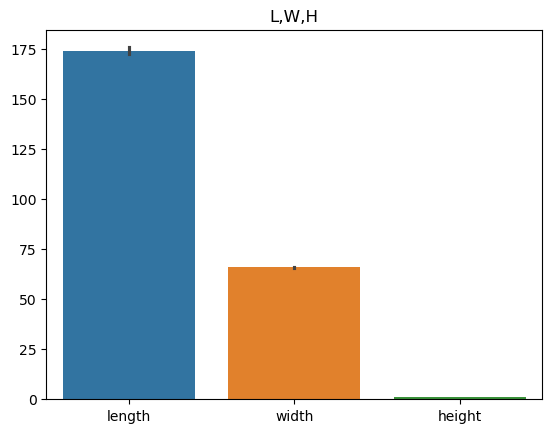

In [382]:
sns.barplot(df[["length","width","height"]])
plt.title("L,W,H")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/lwh.png")

<h2>Descriptive Analysis</h2>

In [385]:
#Describe the Data
df.describe(include = ["object"])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,204,204,204,202,204,204,204,204,204,204
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,167,114,96,120,201,148,158,93


In [387]:
desc_df_ob = pd.DataFrame(df.describe(include = ["object"]))

In [389]:
desc_df_ob

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,204,204,204,202,204,204,204,204,204,204
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,167,114,96,120,201,148,158,93


In [391]:
df.describe(include = [np.number])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,2.040000e+02,2.040000e+02,204.000000,204.000000,2.040000e+02,204.000000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,0.898813,2555.602941,126.892157,3.329050,3.258300e+00,10.148137,1.042228e+02,5.125990e+03,25.240196,30.769608,1.320569e+04,9.943442
std,1.239035,31.758944,5.994144,12.362123,2.146716,0.040550,521.960820,41.744569,0.271331,1.335545e-15,3.981000,4.131286e-13,1.641118e-11,6.551513,6.898337,4.558660e-11,2.577956
min,-2.000000,65.000000,86.600000,141.100000,60.300000,0.799331,1488.000000,61.000000,2.540000,3.258300e+00,7.000000,1.042228e+02,5.125990e+03,13.000000,16.000000,1.320569e+04,4.795918
25%,0.000000,101.000000,94.500000,166.300000,64.075000,0.869565,2145.000000,97.000000,3.150000,3.258300e+00,8.575000,1.042228e+02,5.125990e+03,19.000000,25.000000,1.320569e+04,7.833333
50%,1.000000,122.000000,97.000000,173.200000,65.500000,0.904682,2414.000000,119.500000,3.310000,3.258300e+00,9.000000,1.042228e+02,5.125990e+03,24.000000,30.000000,1.320569e+04,9.791667
75%,2.000000,137.000000,102.400000,183.200000,66.900000,0.928094,2939.250000,142.000000,3.582500,3.258300e+00,9.400000,1.042228e+02,5.125990e+03,30.000000,34.500000,1.320569e+04,12.368421
max,3.000000,256.000000,120.900000,208.100000,72.300000,1.000000,4066.000000,326.000000,3.940000,3.258300e+00,23.000000,1.042228e+02,5.125990e+03,49.000000,54.000000,1.320569e+04,18.076923


In [393]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    120
rwd     75
4wd      9
Name: count, dtype: int64

In [395]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,120
rwd,75
4wd,9


In [397]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,75
4wd,9


In [399]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,75
4wd,9


In [401]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,201
rear,3


In [403]:
#Find number of unique drive wheel
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [405]:
df_group_one = df[['drive-wheels','body-style','price']]

In [408]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,13205.69
1,4wd,sedan,13205.69
2,4wd,wagon,13205.69
3,fwd,convertible,13205.69
4,fwd,hardtop,13205.69
5,fwd,hatchback,13205.69
6,fwd,sedan,13205.69
7,fwd,wagon,13205.69
8,rwd,convertible,13205.69
9,rwd,hardtop,13205.69


In [410]:
#Pivot Table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  NaN       NaN  13205.69  13205.69  13205.69
fwd             13205.69  13205.69  13205.69  13205.69  13205.69
rwd             13205.69  13205.69  13205.69  13205.69  13205.69

In [412]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                 0.00      0.00  13205.69  13205.69  13205.69
fwd             13205.69  13205.69  13205.69  13205.69  13205.69
rwd             13205.69  13205.69  13205.69  13205.69  13205.69

<h3>Visualization of Descriptif Analysis</h3>

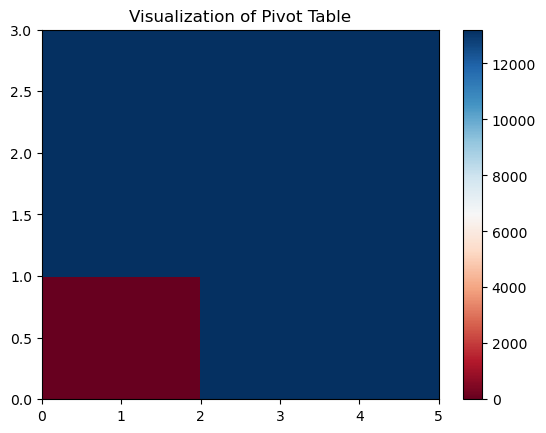

In [415]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.title("Visualization of Pivot Table")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/grpivot.png")
plt.show()

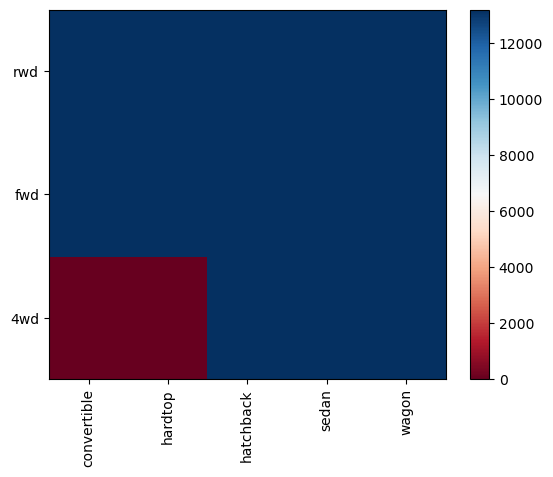

In [417]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)

#plt.savefig("./DATA ANALYSIS PROJECT/Image/heatmap.png")

plt.show()

<Axes: xlabel='horsepower', ylabel='Count'>

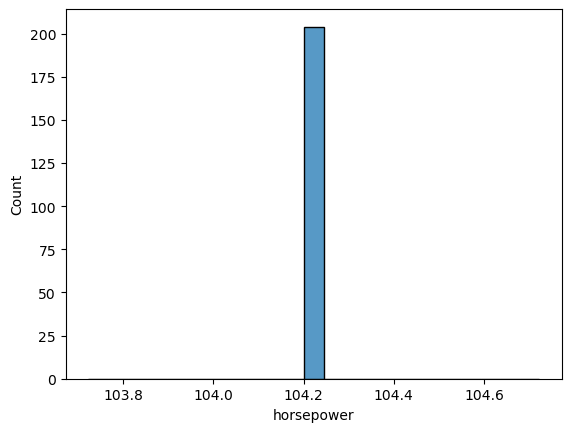

In [419]:
sns.histplot(df["horsepower"], bins = 23)

<h3>Correlation and Causation</h3>

In [424]:
#Correlation between numeric columns
df.select_dtypes(include = "number").corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.468695,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.135712,NaN,-0.177413,NaN,NaN,-0.030557,0.039598,NaN,0.059512
normalized-losses,0.468695,1.000000,-0.056919,0.019217,0.084342,-0.374472,0.097785,0.110998,-0.029330,NaN,-0.114548,NaN,NaN,-0.218973,-0.178351,NaN,0.232815
wheel-base,-0.525095,-0.056919,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.496912,NaN,0.249199,NaN,NaN,-0.479633,-0.552897,NaN,0.481709
length,-0.356792,0.019217,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.608241,NaN,0.157913,NaN,NaN,-0.673251,-0.706635,NaN,0.660849
width,-0.227799,0.084342,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.562663,NaN,0.180287,NaN,NaN,-0.647177,-0.681169,NaN,0.686446
height,-0.533078,-0.374472,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.178237,NaN,0.261036,NaN,NaN,-0.055659,-0.113995,NaN,0.002481
curb-weight,-0.229281,0.097785,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.648965,NaN,0.151372,NaN,NaN,-0.758238,-0.798088,NaN,0.792400
engine-size,-0.107229,0.110998,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.584069,NaN,0.029083,NaN,NaN,-0.654101,-0.677775,NaN,0.745213
bore,-0.135712,-0.029330,0.496912,0.608241,0.562663,0.178237,0.648965,0.584069,1.000000,NaN,0.005949,NaN,NaN,-0.583781,-0.586361,NaN,0.555334
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5>P-Value</h5>

In [427]:
#Wheel base and Price
pearson_coef, p_val =ss.ttest_ind(df["wheel-base"],df["price"])

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [429]:
pearson_coef

-31231.105404710004

In [431]:
p_val

0.0

In [433]:
pearson_coef, p_value = ss.ttest_ind(df['horsepower'], df['price'])

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [435]:
pearson_coef

-1.0262136444130414e+17

In [437]:
pearson_coef, p_value = ss.ttest_ind(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is -87423.52356525624  with a P-value of P = 0.0


C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [439]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,3.2583,9.0,104.222772,5125.990099,21,27.0,13205.69,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.2583,9.0,104.222772,5125.990099,19,26.0,13205.69,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,10.0,104.222772,5125.990099,24,30.0,13205.69,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.2583,8.0,104.222772,5125.990099,18,22.0,13205.69,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.2583,8.5,104.222772,5125.990099,19,25.0,13205.69,12.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.2583,9.5,104.222772,5125.990099,23,28.0,13205.69,10.217391
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.2583,8.7,104.222772,5125.990099,19,25.0,13205.69,12.368421
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,3.2583,8.8,104.222772,5125.990099,18,23.0,13205.69,13.055556
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.2583,23.0,104.222772,5125.990099,26,27.0,13205.69,9.038462


In [441]:
#Select all categorical var
cat_var = df.select_dtypes(include = "object").columns.tolist()
cat_data = df.select_dtypes(include = "object")

In [443]:
cat_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
199,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
202,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [445]:
num_var = df.select_dtypes(include = "number").columns.tolist()

In [447]:
num_data = df.select_dtypes(include = "number")

<h3>Indicator variable</h3>

In [450]:
dum_var_1 = pd.get_dummies(cat_data["fuel-type"])

In [452]:
dum_var_1

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
199,False,True
200,False,True
201,False,True
202,True,False


In [454]:
dum_var_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [456]:
dum_var_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dum_var_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [458]:
dum_var_1

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
199,False,True
200,False,True
201,False,True
202,True,False


In [189]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dum_var_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [460]:
df.to_csv("./Desktop/CarDataclean.csv")

In [193]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.2583,9.0,104.222772,5125.990099,21,8.703704,13205.69,11.190476,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.2583,9.0,104.222772,5125.990099,19,9.038462,13205.69,12.368421,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.2583,10.0,104.222772,5125.990099,24,7.833333,13205.69,9.791667,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.2583,8.0,104.222772,5125.990099,18,10.681818,13205.69,13.055556,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.2583,8.5,104.222772,5125.990099,19,9.400000,13205.69,12.368421,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.2583,9.5,104.222772,5125.990099,23,8.392857,13205.69,10.217391,False,True
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.2583,8.7,104.222772,5125.990099,19,9.400000,13205.69,12.368421,False,True
201,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.2583,8.8,104.222772,5125.990099,18,10.217391,13205.69,13.055556,False,True
202,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.2583,23.0,104.222772,5125.990099,26,8.703704,13205.69,9.038462,True,False


In [197]:
df.to_csv('./Desktop/DATA ANALYSIS PROJECT/PYTHON/clean_df.csv')

<h3>ML Model</h3>

In [199]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
#Choose X and y
X = df[["peak-rpm","city-L/100km","city-mpg"]]
y = df["price"]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 4, random_state = 44)

In [206]:
#Choose the model and fit it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [208]:
#Predict the test
y_predict = model.predict(X_test)

In [210]:
y_predict

array([13205.69, 13205.69, 13205.69, 13205.69])

In [212]:
X_train

,peak-rpm,city-L/100km,city-mpg
23,5125.990099,7.580645,31
80,5125.990099,9.400000,25
54,5125.990099,13.823529,17
3,5125.990099,13.055556,18
176,5125.990099,8.703704,27
...,...,...,...
131,5125.990099,11.190476,21
59,5125.990099,9.038462,26
173,5125.990099,7.833333,30
163,5125.990099,8.103448,29


In [214]:
X_test

,peak-rpm,city-L/100km,city-mpg
184,5125.990099,8.703704,27
141,5125.990099,8.392857,28
170,5125.990099,9.791667,24
28,5125.990099,12.368421,19


In [216]:
y_train

23     13205.69
80     13205.69
54     13205.69
3      13205.69
176    13205.69
         ...   
131    13205.69
59     13205.69
173    13205.69
163    13205.69
20     13205.69
Name: price, Length: 200, dtype: float64

In [218]:
y_test

184    13205.69
141    13205.69
170    13205.69
28     13205.69
Name: price, dtype: float64

In [220]:
#Find the mean square error
mse = mean_squared_error(y_test, y_predict)

In [222]:
f"The mean Square error is : {mse}"

'The mean Square error is : 0.0'

In [224]:
r2sc = r2_score(y_test, y_predict)

In [226]:
f"The root square score is : {r2sc}"

'The root square score is : 1.0'

Text(0.5, 1.0, 'L, W, H')

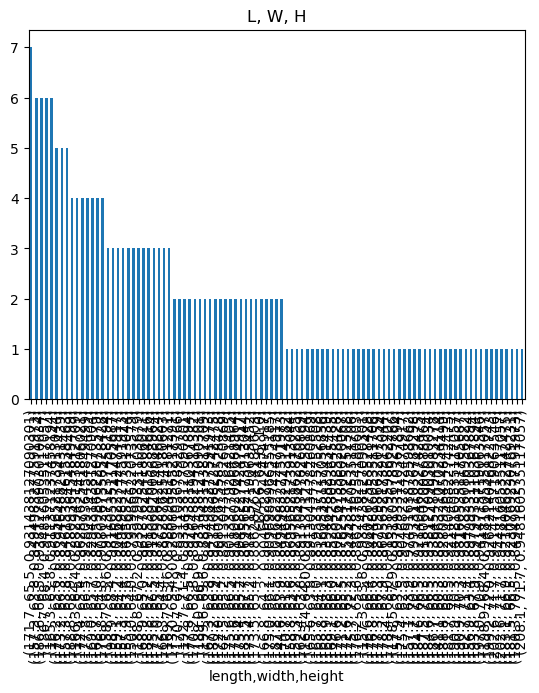

In [235]:
num_data[["length", "width","height"]].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.title("L, W, H")
#plt.savefig("./DATA ANALYSIS PROJECT/Image/lwh2.png")

In [ ]:
num_data["length"].value_counts().sort_values(ascending = False).plot(kind = "bar")

In [ ]:
df["wheel-base"].value_counts().sort_values(ascending = False).plot(kind = "density")

In [ ]:
df["wheel-base"].value_counts().sort_values(ascending = False).plot(kind = "line")

In [ ]:
df["wheel-base"].value_counts().sort_values(ascending = False).plot(kind = "bar")

In [ ]:
#num_data.to_csv('./DATA ANALYSIS PROJECT/PYTHON/numerical_df.csv')
#cat_data.to_csv('./DATA ANALYSIS PROJECT/PYTHON/categorical_df.csv')

In [245]:
df.to_csv("./Desktop/DATA ANALYSIS PROJECT/All_Data/Autocleandata.csv")

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
